<a href="https://colab.research.google.com/github/profitisthebest/math33b/blob/main/computationalhw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1:**
Consider a damped forced system:

$y'' - \frac{\mu}{m} \cdot y' + \frac{k}{m} \cdot y = \frac{F_0}{m} \cdot \cos(\omega t)$

where $\omega$ is the forcing frequency. Using analytical methods, we find the steady state response (particular solution)

$y_s(t) = \frac{F_0}{m\sqrt{(2\omega p)^2 + (\omega_0^2 - \omega^2)^2}} \cdot \cos(\omega t + \gamma) $

where

$ p = \frac{\mu}{2m}$, $\omega_0 = \sqrt{\frac{k}{m}}$, $ \gamma = \arctan\left(\frac{2\omega p}{\omega_0^2 - \omega^2}\right)$

a) Let $ m = 4, \mu = 1, k = 8, and F_0 = 8$. Plot the amplitude $A$ of the steady state response versus $\omega$ for $0 \leq \omega \leq 5$.

b) With the same parameters, plot the phase shift $\gamma$ of the steady-state response versus $\omega$ for $0 \leq \omega \leq 5$.

c) Estimate the maximum value of $A$ and the frequency $\omega$ for which it occurs.

In [17]:
# define imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

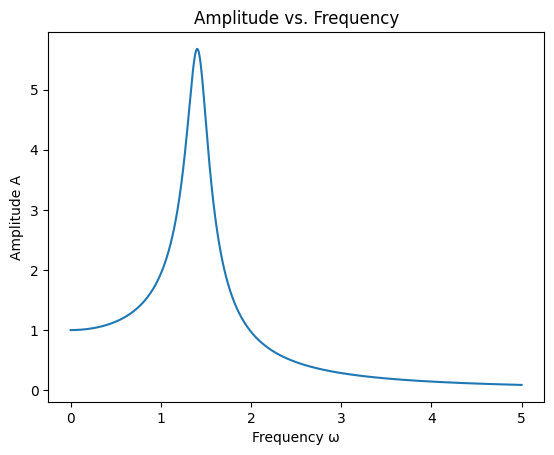

In [30]:
# Problem 1, Part a

# define params
m = 4
mu = 1
k = 8
F0 = 8
p = mu / (2 * m)
omega0 = np.sqrt(k / m)

# create range for omega
omega_range = np.linspace(0, 5, 1000)

# calculate amplitude
A = F0 / (m * np.sqrt((2 * omega_range * p)**2 + (omega0**2 - omega_range**2)**2))

# plot
plt.plot(omega_range, A)
plt.xlabel('Frequency ω')
plt.ylabel('Amplitude A')
plt.title('Amplitude vs. Frequency')
plt.show()

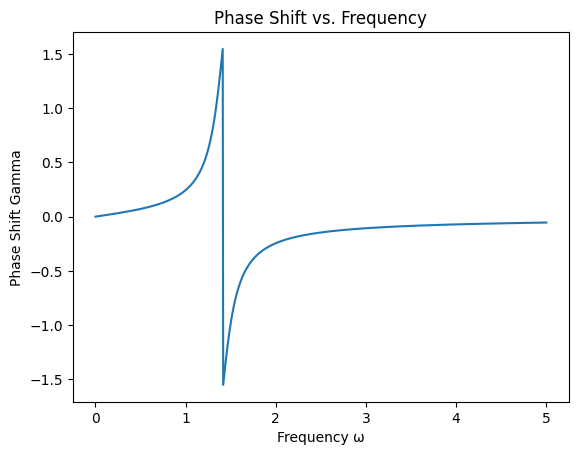

In [31]:
# Problem 1, Part b

# define params
m = 4
mu = 1
k = 8
F0 = 8
p = mu / (2 * m)
omega0 = np.sqrt(k / m)

# create range for omega and calculate phase shift
omega_range = np.linspace(0, 5, 1000)
gamma = np.arctan((2 * omega_range * p) / (omega0**2 - omega_range**2))

# plot
plt.plot(omega_range, gamma)
plt.xlabel('Frequency ω')
plt.ylabel('Phase Shift Gamma')
plt.title('Phase Shift vs. Frequency')
plt.show()

In [20]:
# Problem 1, Part c

# define params
m = 4
mu = 1
k = 8
F0 = 8
p = mu / (2 * m)
omega0 = np.sqrt(k / m)

# create range for omega
omega_range = np.linspace(0, 5, 1000)

# calculate amplitude
A = F0 / (m * np.sqrt((2 * omega_range * p)**2 + (omega0**2 - omega_range**2)**2))

# find max amplitude and the corresponding omega
i = np.argmax(A)
max_A = A[i]
omega = omega_range[i]

# output resulting values
print("Maximum amplitude:", max_A)
print("Corresponding frequency:", omega)


Maximum amplitude: 5.678548916920815
Corresponding frequency: 1.4014014014014013


**Problem 2:**
Consider an undamped mass-spring system where $m = 2, k = 10, $ and $\mu = 0$
with forcing function $F(t) = cos(\omega t)$

$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 2y''(t) - 10y(t) = \cos(p\omega t)\ , \ \ \ y(0) = y'(0) = 0 $.

a) Plot the solution $y(t)$ with $\omega = 2.5$ for $0 \leq t \leq 100$.

b) Experiment with different values for the forcing frequency $\omega$ in $F(t) = cos(\omega t)$. Find the maximum range of values (to 2 decimal places) such that the maximum amplitude $|y(t)|$ exceeds 1. (Note. It may be helpful to use a $for$ loop and $max$ function.)

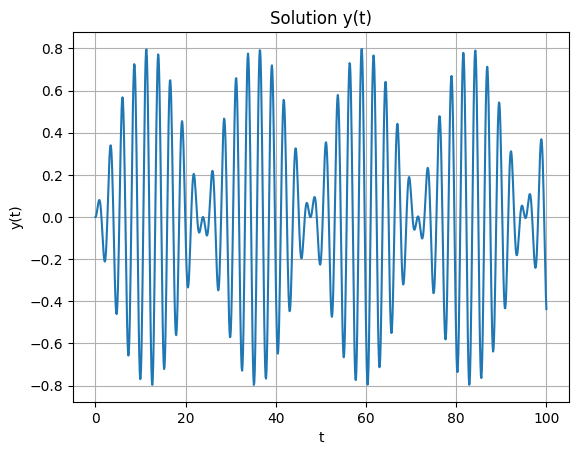

In [32]:
# Problem 2, Part a

# model returns the derivatives of y
def model(y, t, omega):
    dydt = y[1]  # y' = dy/dt
    dy2dt2 = (1/2)*np.cos(omega * t) - 5*y[0]  # y'' = (1/2)cos(omega*t) - 5*y
    return [dydt, dy2dt2]

# set params and initial conditions
omega = 2.5
initial_conditions = [0, 0] # [y(0) = 0, y'(0) = 0]

# set range for t
t = np.linspace(0, 100, 1000)

# solve
sol = odeint(model, initial_conditions, t, args=(omega, ))
y_t = sol[:, 0]

# plot
plt.plot(t, y_t)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solution y(t)')
plt.grid(True)
plt.show()

In [36]:
# Problem 2, part b

# define model
def model(y, t, omega):
    dydt = y[1]  # y' = dy/dt
    dy2dt2 = (1/2)*np.cos(omega * t) - 5*y[0]  # y'' = (1/2)cos(omega*t) - 5*y
    return [dydt, dy2dt2]

# set initial conditions and range for t
initial_conditions = [0, 0] # [y(0) = 0, y'(0) = 0]
t = np.linspace(0, 100, 1000)

# set range for omega between 0 and 5, with step size of .05
omega_values = np.linspace(0, 5, 100)

# iterate over experimental values for omega
max_amplitudes = []
for omega in omega_values:
    # get solution
    solution = odeint(model, initial_conditions, t, args=(omega, ))
    y_t = solution[:, 0]

    # find max amplitude
    max_amplitude = np.max(np.abs(y_t))
    max_amplitudes.append(max_amplitude)

max_amplitudes = np.array(max_amplitudes)

# get all omega values that have the corresponding max amp greater than 1
selected_omegas = omega_values[max_amplitudes > 1]

# output
selected_omegas = np.round(selected_omegas, 2)
print("Omega values for which maximum amplitude |y(t)| > 1:", selected_omegas)

Omega values for which maximum amplitude |y(t)| > 1: [2.02 2.07 2.12 2.17 2.22 2.27 2.32 2.37 2.42]
